In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv3D, Conv3DTranspose, Flatten, Dense
import numpy as np

Using TensorFlow backend.


In [3]:
%load_ext autoreload
%autoreload 2
%aimport data
%reload_ext data
import data
from config import patch_data_path
import preprocessing
import os
import net

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
import pandas as pd
records = pd.read_csv(os.path.join(patch_data_path,"records.csv"))

In [5]:
names = list(records[records["positiv"]]["filepath"])
names = [name.split("/")[-1]+".npy" for name in names]

In [6]:
adg = preprocessing.AneurysmDataGenerator(patch_data_path,names)

<Figure size 4800x3200 with 0 Axes>

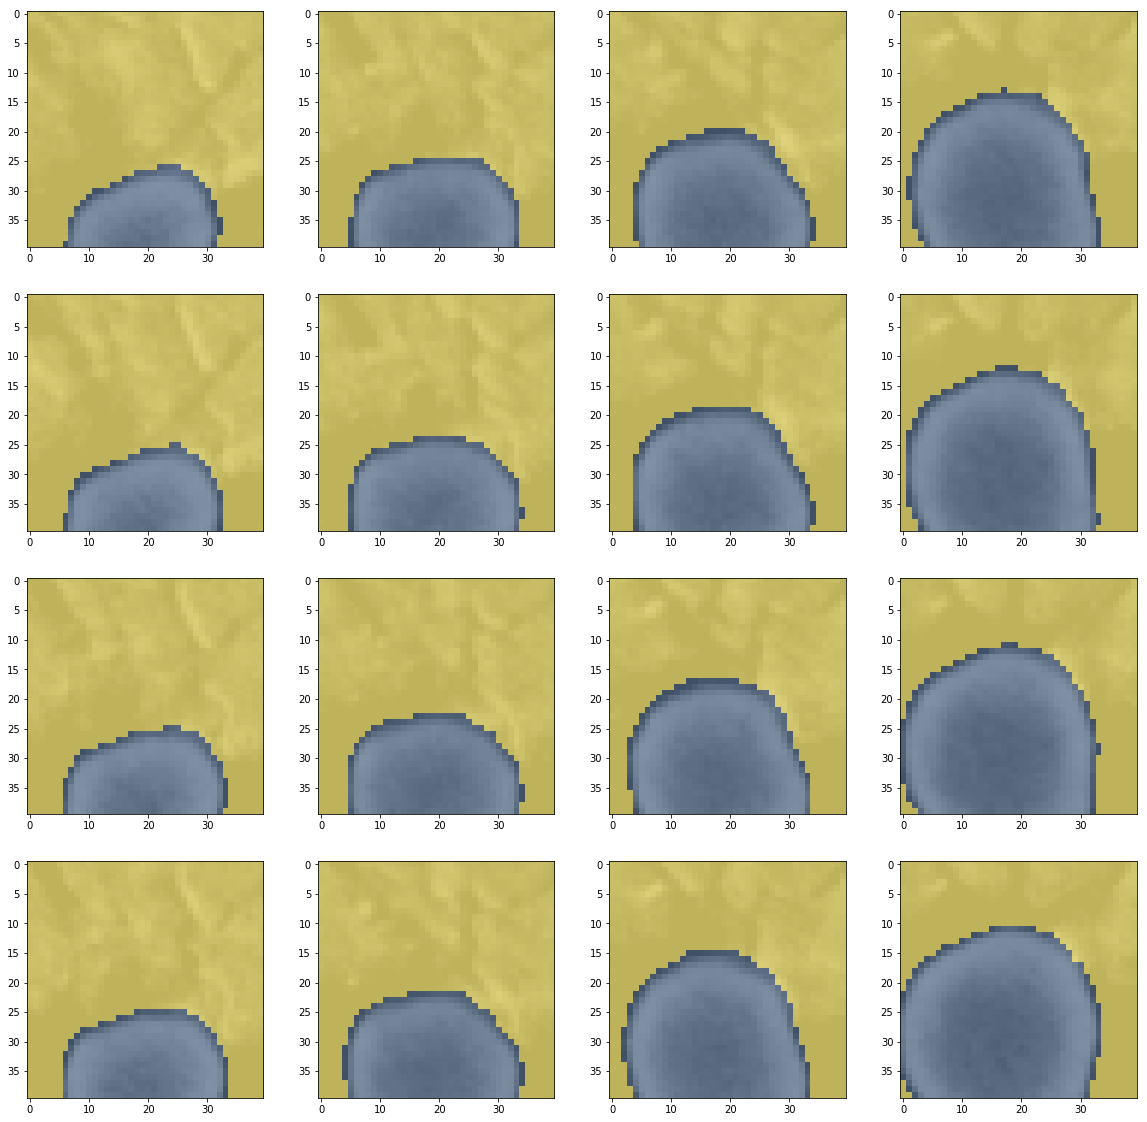

In [7]:
_=adg.show_image(image_idx=237)

In [8]:
model = net.conv_model_auto_deep()

In [9]:
x = adg.images#[image for i, image in enumerate(adg.images) if np.mean(adg.masks[i])>0.01]
x = np.array(x)
x = x.reshape(*x.shape,1)
y = adg.images#[mask for i, image in enumerate(adg.masks) if np.mean(adg.masks[i])>0.01]
y = np.array(y)
y = y.reshape(*y.shape,1)

In [24]:
model.fit(x,y,batch_size=20,epochs=10,validation_split=0.05)

Train on 410 samples, validate on 22 samples
Epoch 1/10
410/410 [==============================] - 5s 13ms/sample - loss: 9.8268 - acc: 0.0000e+00 - val_loss: 8.7340 - val_acc: 0.0000e+00
Epoch 2/10
410/410 [==============================] - 5s 13ms/sample - loss: 9.8278 - acc: 0.0000e+00 - val_loss: 8.4272 - val_acc: 0.0000e+00
Epoch 3/10
410/410 [==============================] - 5s 13ms/sample - loss: 9.8341 - acc: 0.0000e+00 - val_loss: 8.4226 - val_acc: 0.0000e+00
Epoch 4/10
410/410 [==============================] - 5s 13ms/sample - loss: 9.7884 - acc: 0.0000e+00 - val_loss: 8.4405 - val_acc: 0.0000e+00
Epoch 5/10
410/410 [==============================] - 6s 13ms/sample - loss: 9.8166 - acc: 0.0000e+00 - val_loss: 8.4707 - val_acc: 0.0000e+00
Epoch 6/10
410/410 [==============================] - 6s 13ms/sample - loss: 9.8039 - acc: 0.0000e+00 - val_loss: 8.4169 - val_acc: 0.0000e+00
Epoch 7/10
410/410 [==============================] - 6s 14ms/sample - loss: 9.7908 - acc: 0.0000

In [11]:
np.mean([np.mean(mask) for mask in adg.masks])

0.015873408564814815

In [12]:
x.shape

(432, 40, 40, 40, 1)

In [26]:
np.mean(adg.masks)

0.015873408564814815

In [25]:
result = model.predict(x).reshape((-1,40,40,40))
np.mean(result)

0.10892415

In [14]:
result = model.predict(x).reshape((-1,40,40,40))

In [27]:
result = model.predict(x[431:]).reshape((40,40,40))
print(np.max(result), np.mean(result))

1.0 0.031777874


<Figure size 16000x16000 with 0 Axes>

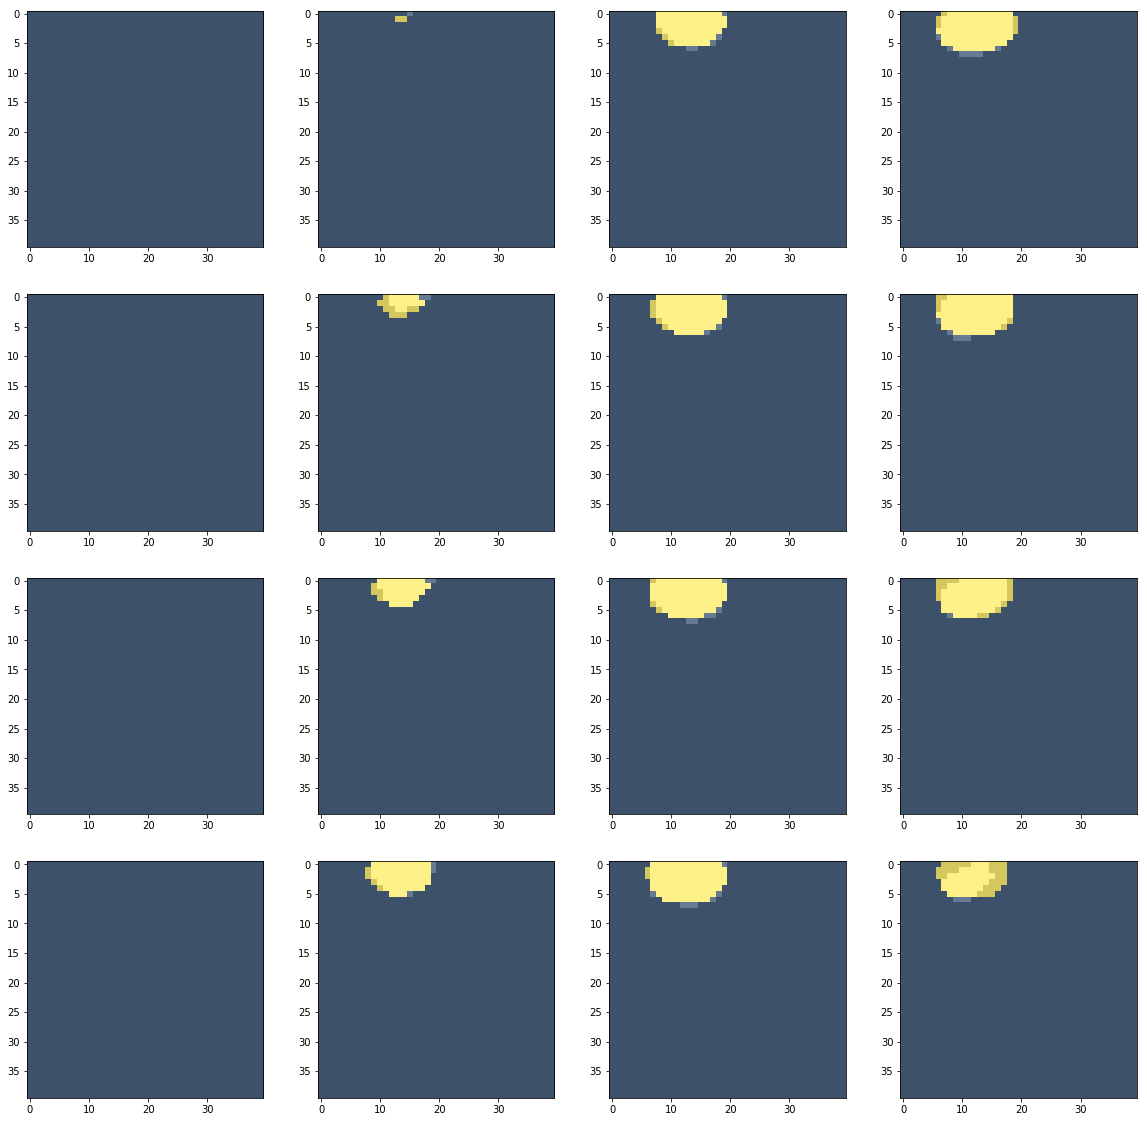

In [35]:
import matplotlib.pyplot as plt
N=4
image = adg.masks[-1]
mask = result >0.98
plt.figure(dpi=800)
plt.rcParams['figure.figsize'] = [20,20]
fig, ax = plt.subplots(nrows=N, ncols=N)
for i in range(N):
    for j in range(N):
        im = image[i+j*N+16,:,:]
        m = mask[i+j*N+16,:,:]
        ax[i,j].imshow(im,alpha=0.4,cmap="Greys_r",vmin=0,vmax=1)
        ax[i,j].imshow(m,alpha=0.6, cmap="cividis",vmin=0,vmax=1)


In [18]:
np.mean(result)

0.036762107

In [37]:
import config

In [36]:
adg.names[237]

'A095-1x2x3.npy'

In [44]:
image = np.load(os.path.join(config.full_data_path,"image","A095.dcm.npy"))
image = image.reshape(1,*image.shape,1)
image.shape

(1, 220, 256, 256, 1)

In [3]:
"tesetx"[-1:]

'x'